In [1]:
!pip install ctgan

   ---------------------------------------- 0.0/63.7 kB ? eta -:--:--
   ------------ --------------------------- 20.5/63.7 kB ? eta -:--:--
   ------------ --------------------------- 20.5/63.7 kB ? eta -:--:--
   ------------------- -------------------- 30.7/63.7 kB 163.8 kB/s eta 0:00:01
   ---------------------------------------- 63.7/63.7 kB 379.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.8 MB 7.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 7.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.8 MB 8.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 6.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.7/1.8 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.7 MB/s eta 0:00:00


In [2]:
!pip install table_evaluator

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.6 MB 6.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.6 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 6.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.6 MB 6.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 4.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.6 MB 3.3 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/10.6 MB 3.4 MB/s eta 0:00:03
   ---

In [5]:
import pandas as pd
data = pd.read_csv('insurance.csv')

In [6]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
categorical_features = ['age','sex','children','smoker','region']

In [8]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Gen. (0.17) | Discrim. (-0.08): 100%|████████████████████████████████████████████████| 200/200 [01:13<00:00,  2.72it/s]


In [9]:
samples = ctgan.sample(1000)

In [10]:
samples

,age,sex,bmi,children,smoker,region,charges
0,37,male,48.179172,0,no,southeast,4300.344549
1,22,male,26.172598,1,yes,southwest,18431.813949
2,40,male,46.511102,0,no,northwest,16202.386765
3,28,male,40.016001,0,yes,southeast,12346.084697
4,19,male,41.344688,1,no,northeast,9284.474337
...,...,...,...,...,...,...,...
995,51,male,41.935236,3,no,northwest,8016.968675
996,37,male,33.563092,1,no,northeast,3514.512051
997,59,male,20.312517,5,no,southwest,6987.727265
998,50,male,22.333884,2,no,northwest,21502.337593


# validating the generated synthetic data

# comparing using Inbuild function

(1338, 7) (1000, 7)


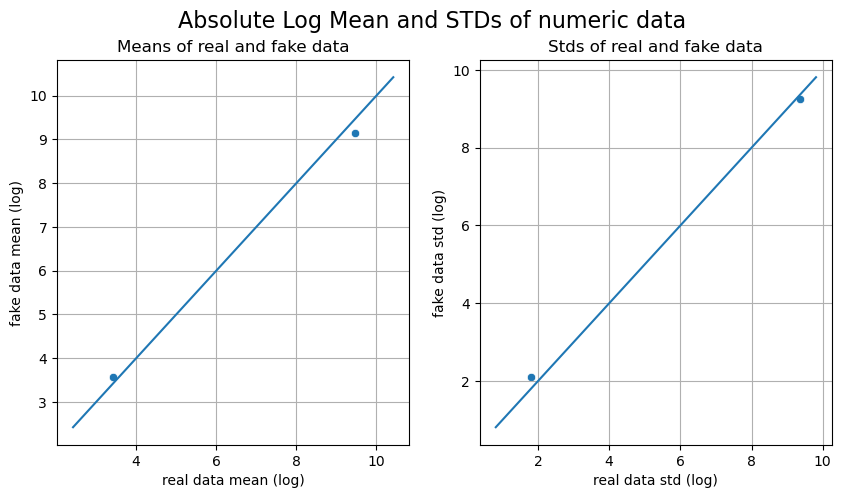

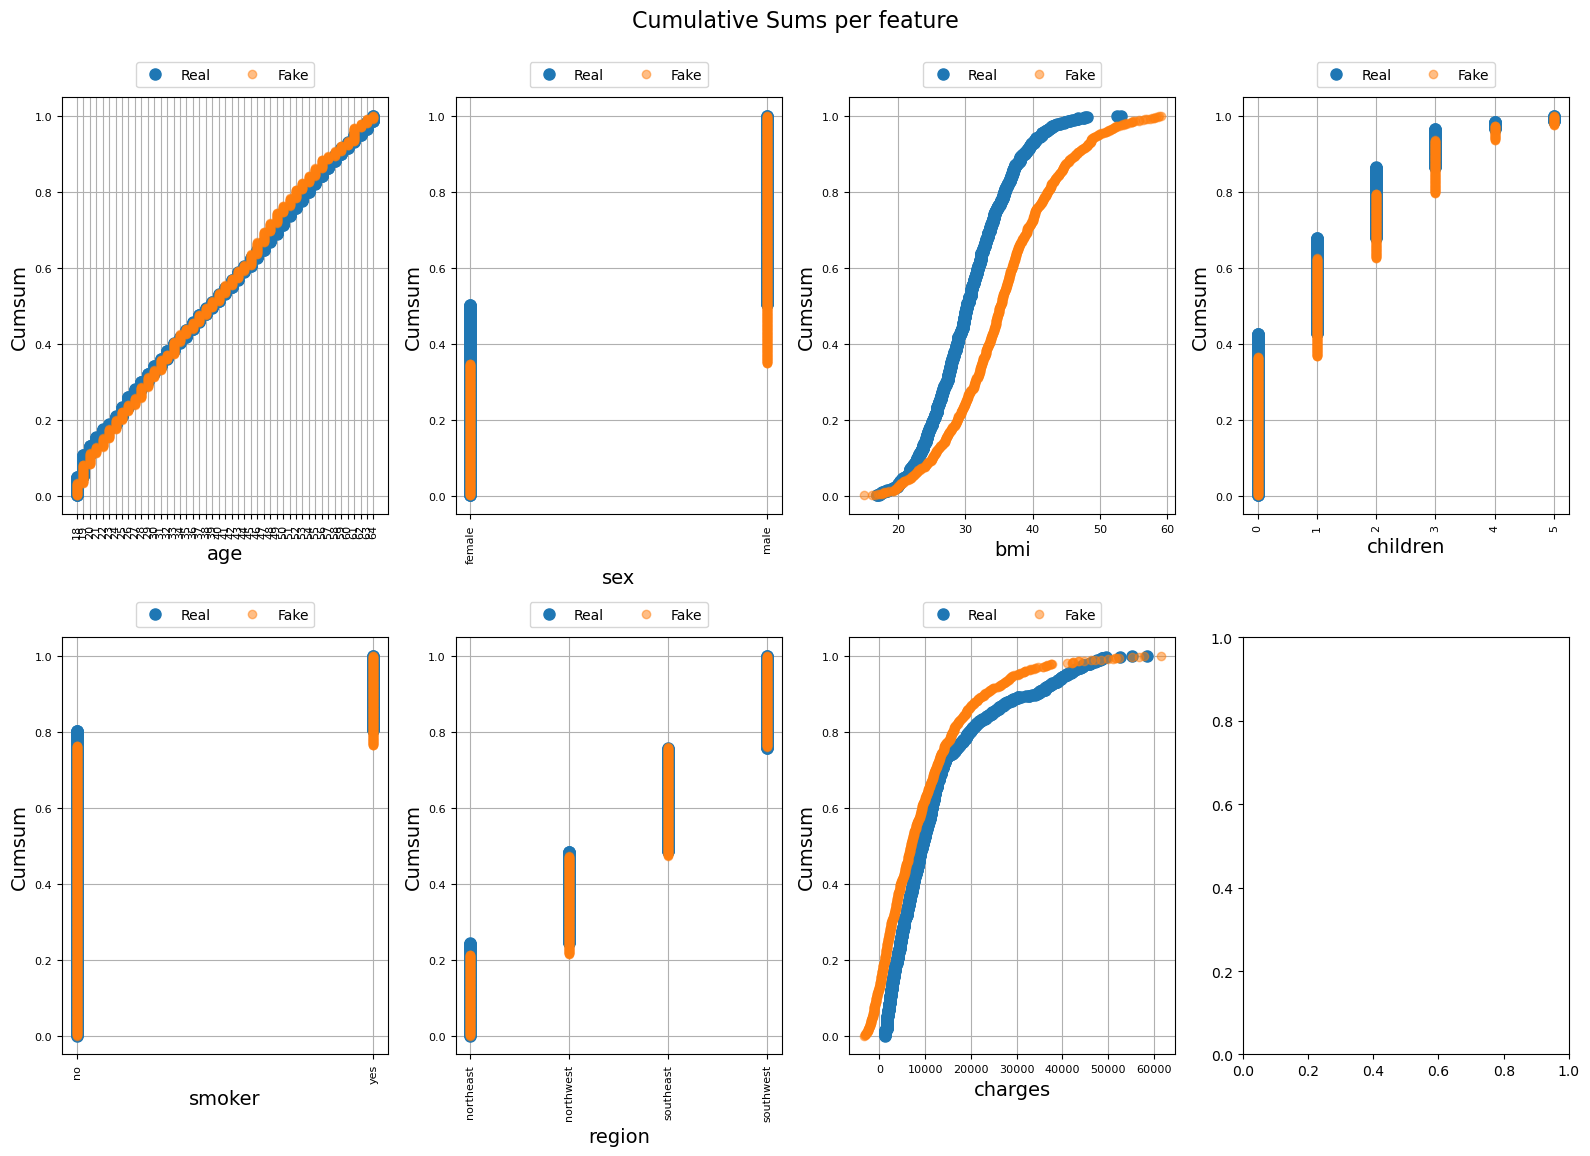

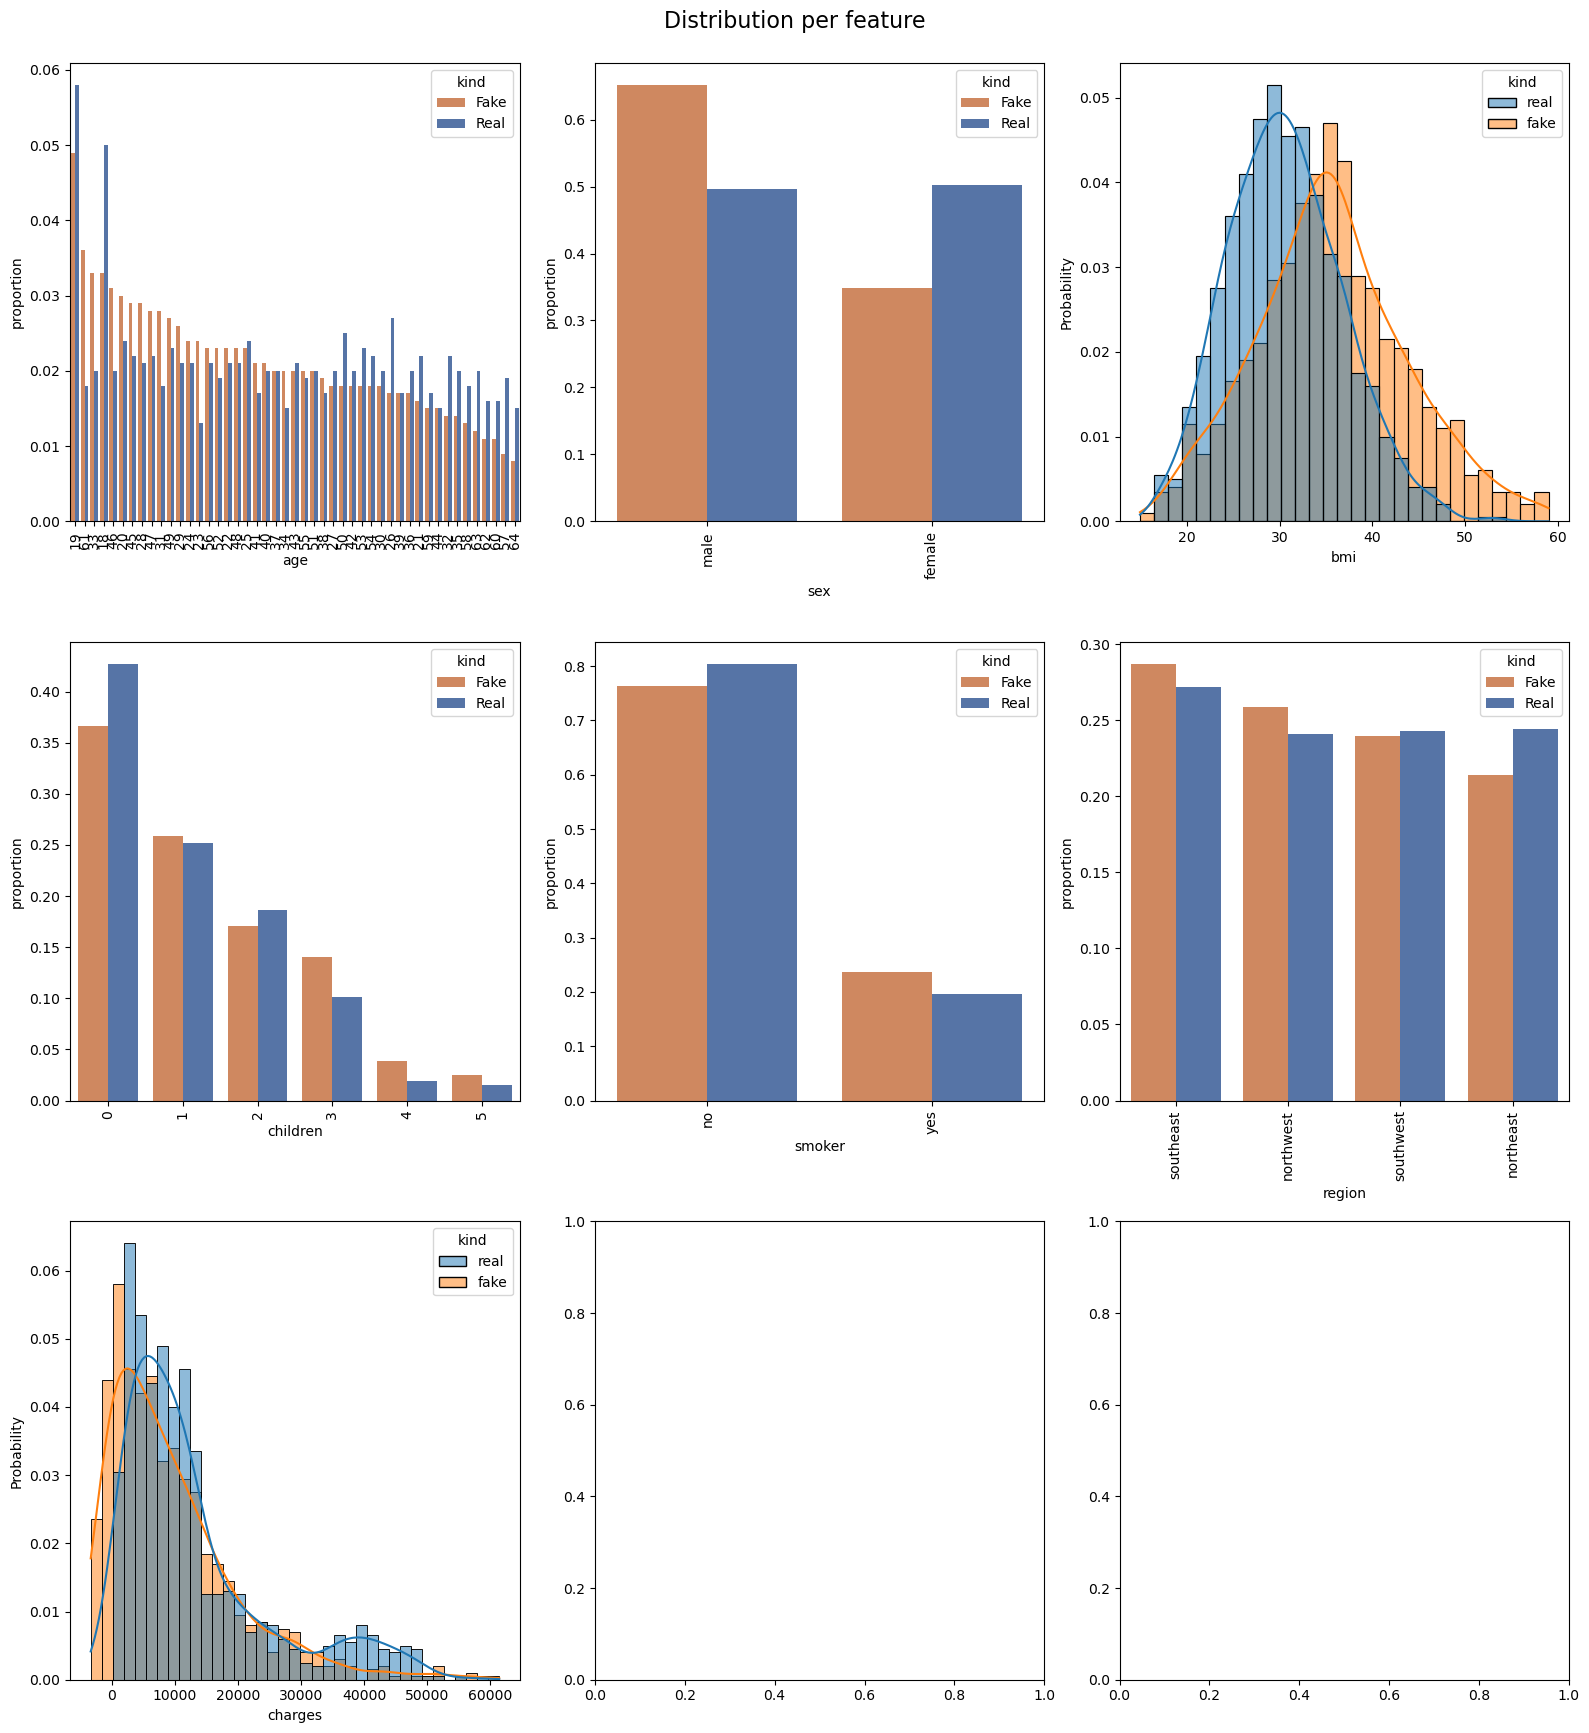

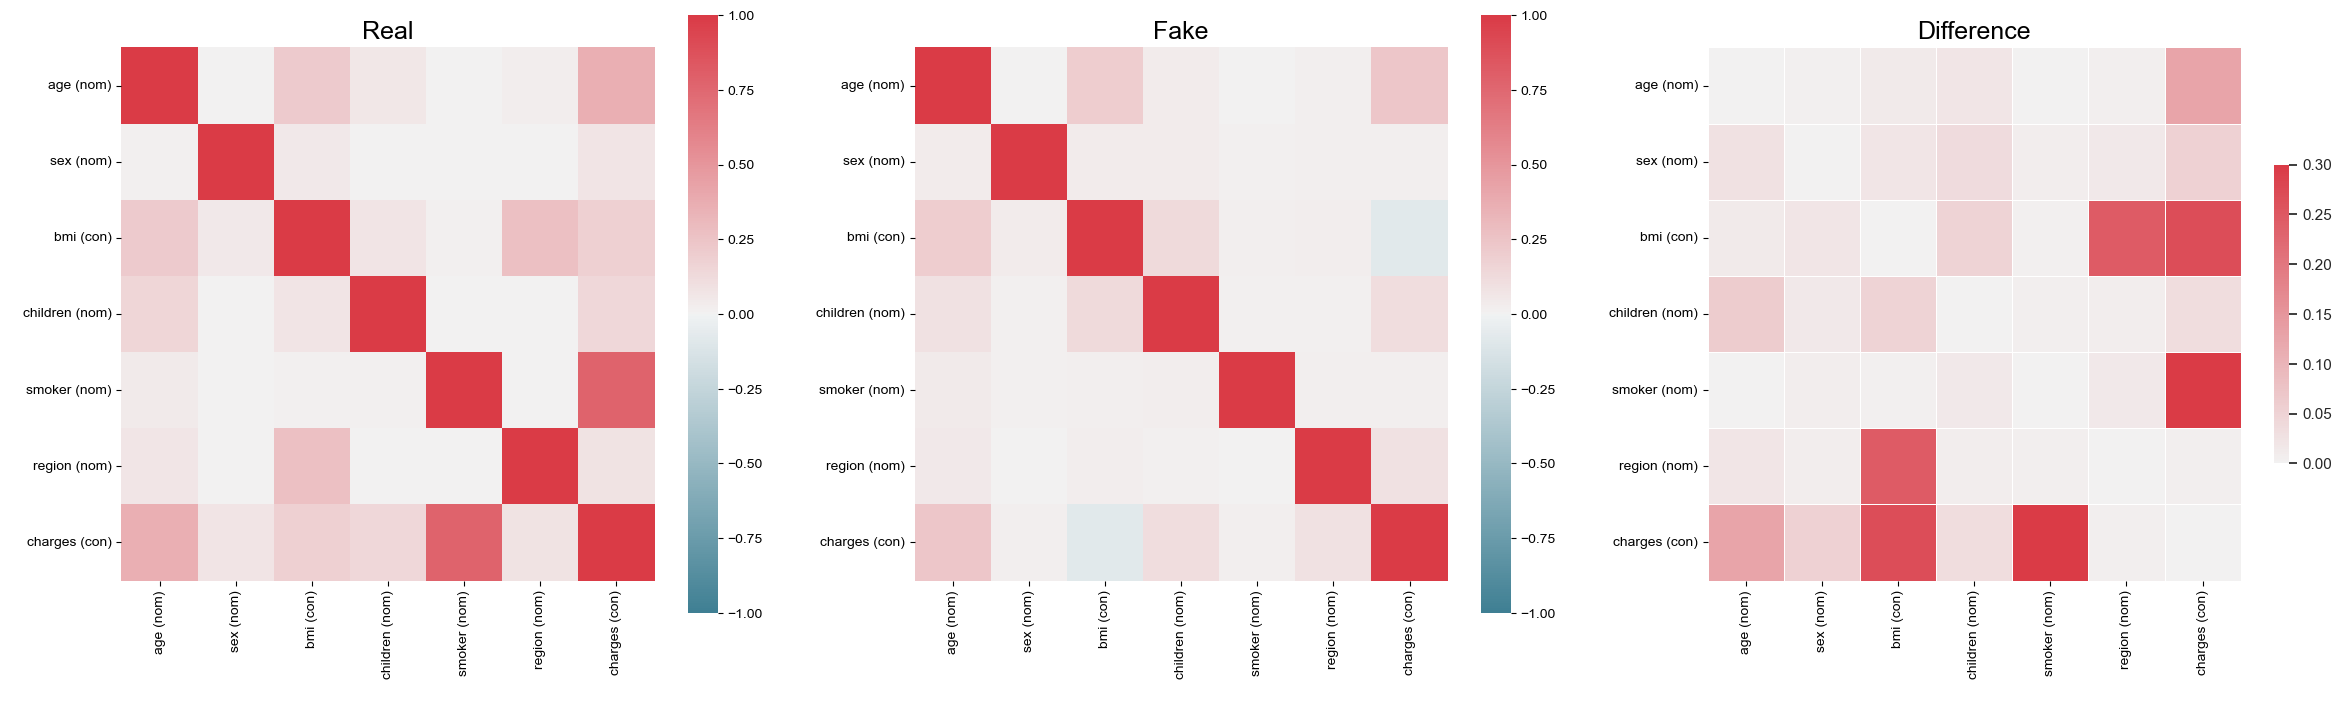

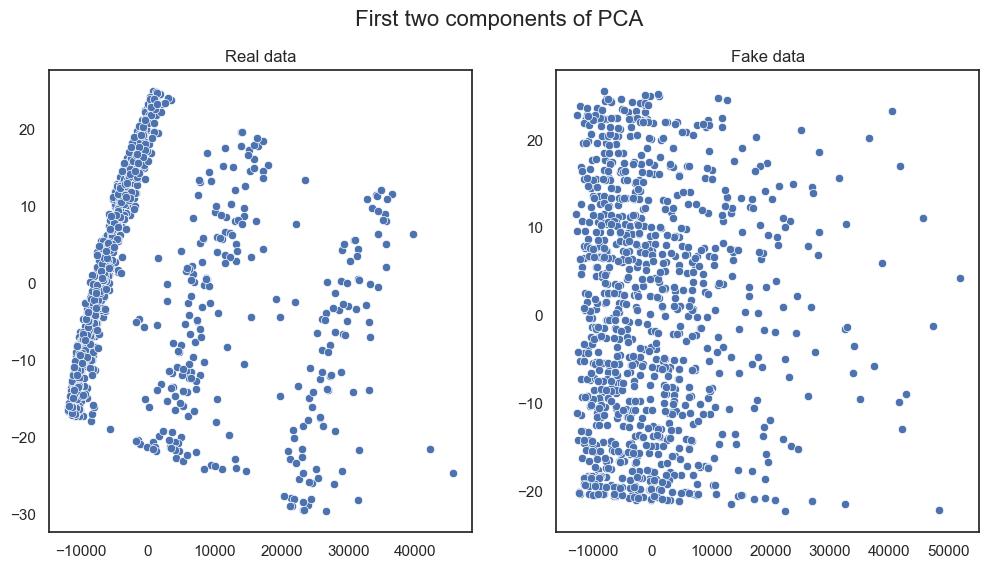

In [13]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

Here we can see that there is a slight difference in generated fake data and the real data

# compare manually

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

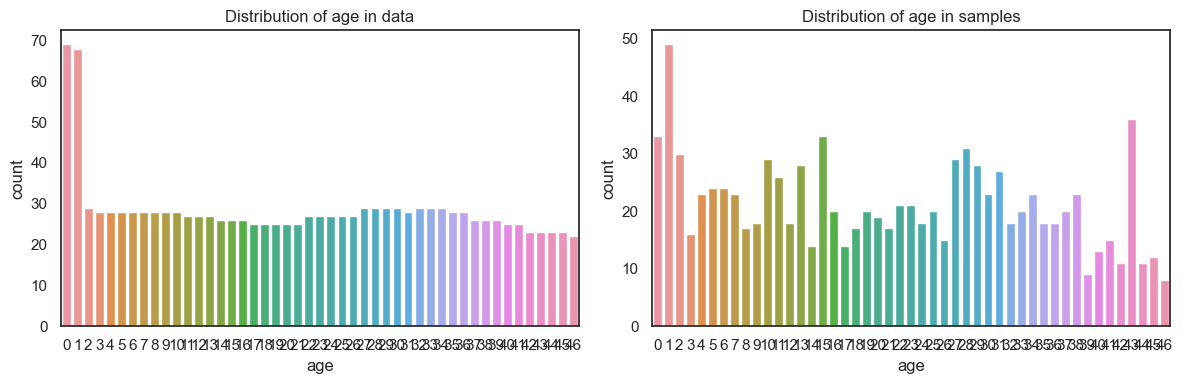

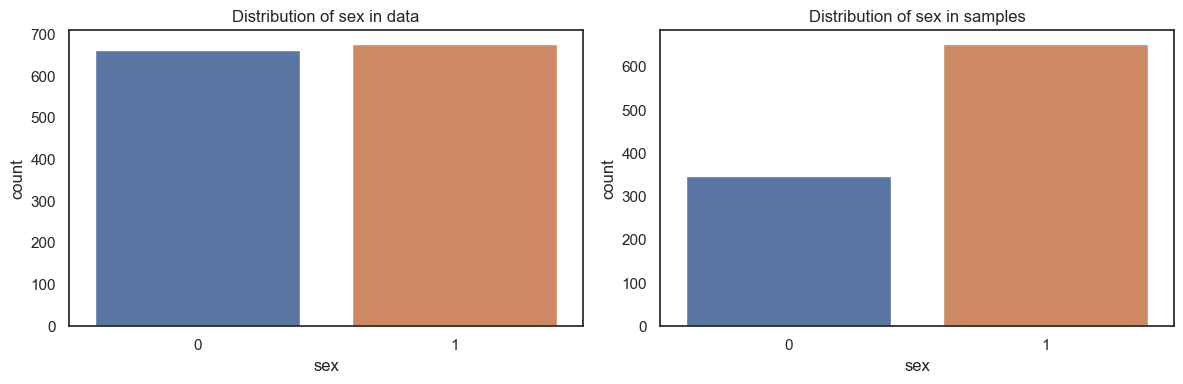

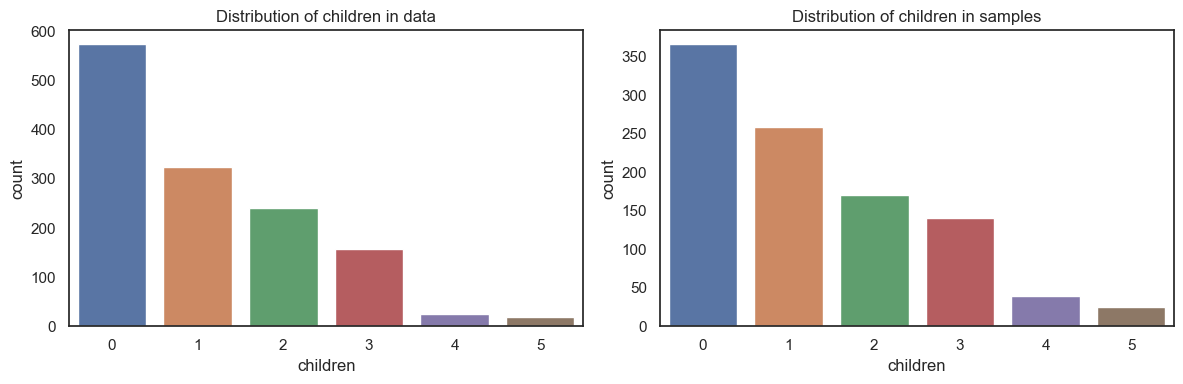

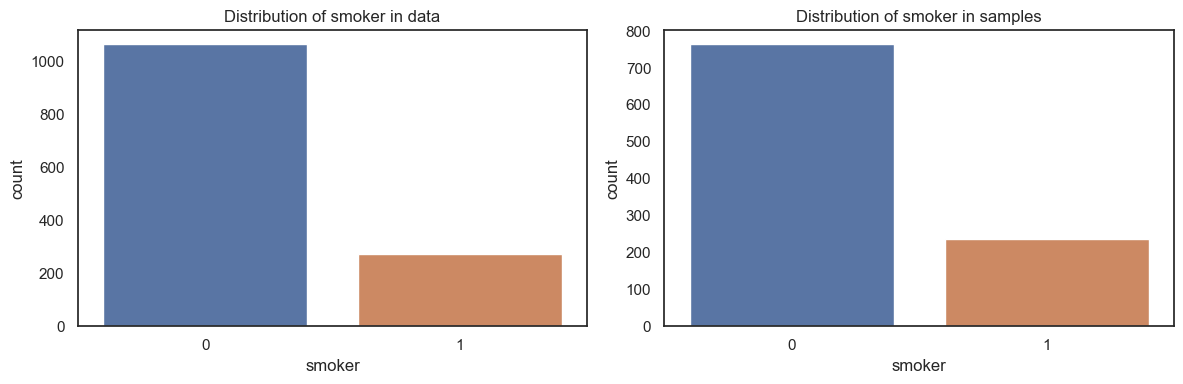

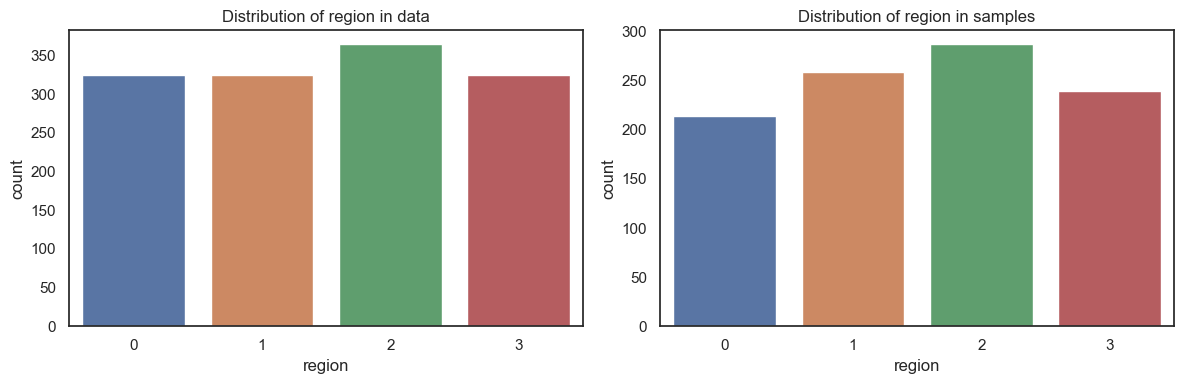

In [18]:
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    samples[feature] = le.transform(samples[feature])
    label_encoders[feature] = le

# Validate samples against data
for feature in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(data=data, x=feature, ax=axes[0])
    axes[0].set_title(f'Distribution of {feature} in data')
    sns.countplot(data=samples, x=feature, ax=axes[1])
    axes[1].set_title(f'Distribution of {feature} in samples')
    plt.tight_layout()
    plt.show()

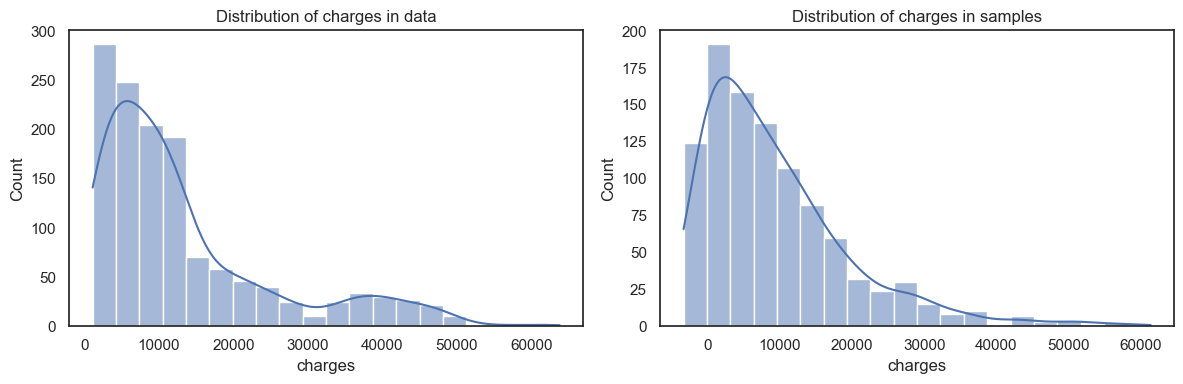

In [17]:
# Compare charges distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data['charges'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of charges in data')
sns.histplot(samples['charges'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of charges in samples')
plt.tight_layout()
plt.show()